In [7]:
from fastapi import FastAPI, UploadFile, File
import uvicorn
from PIL import Image
import io
import numpy as np
import tensorflow as tf

import nest_asyncio
nest_asyncio.apply()

# 初始化 FastAPI 應用
app = FastAPI()

# 載入已保存的 CNN 模型
model = tf.keras.models.load_model(r"D:\Learning_Python\30-Day_AI_Deep_Learning_Plan\mnist_cnn_model.h5")

# 定義一個端點來接受圖片並進行推理
@app.post("/predict/")
async def predict(file: UploadFile = File(...)):
    # 讀取上傳的圖片
    image = Image.open(io.BytesIO(await file.read())).convert('L')  # 轉為灰階
    image = image.resize((28, 28))  # 調整大小到 28x28

    # 預處理圖片
    image_np = np.array(image).reshape(1, 28, 28, 1) / 255.0

    # 模型推理
    predictions = model.predict(image_np)
    predicted_label = np.argmax(predictions, axis=1)[0]

    # 返回分類結果
    return {"predicted_label": int(predicted_label)}

# 運行 FastAPI 應用
if __name__ == "__main__":
    import uvicorn
    uvicorn.run(app, host="0.0.0.0", port=8000)
    

INFO:     Started server process [18976]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


1/1 [==============================] - 0s 63ms/step
INFO:     127.0.0.1:49753 - "POST /predict/ HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [18976]


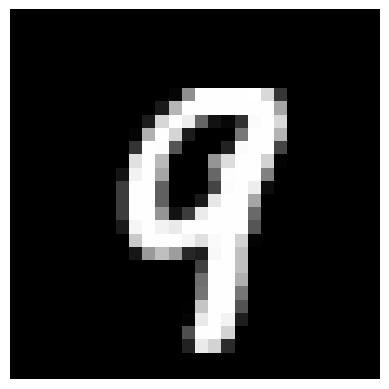

Label for the image: 9


In [6]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# 下载 MNIST 数据集
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 选择一张图片
image_index = 0  # 选择图片的索引
image = x_train[image_index]

# 保存为图片文件
plt.imshow(image, cmap='gray')
plt.axis('off')  # 关闭坐标轴显示
plt.savefig('mnist_digit1.png', bbox_inches='tight', pad_inches=0)  # 保存图片到当前目录
plt.show()

# 输出该图片的标签
print(f"Label for the image: {y_train[image_index]}")
